## Parcial 2. Ciencia de datos aplicada 

Lizeth Viviana Perdomo Castañeda

In [1]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from mlxtend.evaluate import paired_ttest_5x2cv
from imblearn.over_sampling import SMOTE, SMOTENC
import shap
from scipy import stats
from statsmodels.stats.contingency_tables import mcnemar
from mlxtend.evaluate import mcnemar_tables
from mlxtend.plotting import checkerboard_plot
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [4]:
ruta = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Examen\Parcial 2\diabetes_data_complete.csv'
diabetes_df = pd.read_csv(ruta)

In [5]:
print("Resumen del dataset:")
print(diabetes_df.info())

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                100241 non-null  int64 
 1   encounter_id              100241 non-null  int64 
 2   patient_nbr               100241 non-null  int64 
 3   race                      100241 non-null  object
 4   gender                    100241 non-null  object
 5   age                       100241 non-null  object
 6   admission_type_id         100241 non-null  int64 
 7   discharge_disposition_id  100241 non-null  int64 
 8   admission_source_id       100241 non-null  int64 
 9   time_in_hospital          100241 non-null  int64 
 10  num_lab_procedures        100241 non-null  int64 
 11  num_procedures            100241 non-null  int64 
 12  num_medications           100241 non-null  int64 
 13  number_outpatient         100241 non-n

In [6]:
print("\nEstadísticas descriptivas:")
print(diabetes_df.describe())


Estadísticas descriptivas:
          Unnamed: 0  encounter_id   patient_nbr  admission_type_id  \
count  100241.000000  1.002410e+05  1.002410e+05      100241.000000   
mean    51137.187279  1.660164e+08  5.462896e+07           2.022765   
std     29347.334947  1.026763e+08  3.869475e+07           1.444926   
min         1.000000  1.252200e+04  1.350000e+02           1.000000   
25%     25735.000000  8.556620e+07  2.346089e+07           1.000000   
50%     51264.000000  1.530489e+08  4.604908e+07           1.000000   
75%     76557.000000  2.310624e+08  8.778530e+07           3.000000   
max    101765.000000  4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             100241.000000        100241.000000     100241.000000   
mean                   3.729153             5.760627          4.420307   
std                    5.280776             4.063118          2.991258   
min                    1.000000     

In [7]:
print("\nValores faltantes por columna:")
print(diabetes_df.isnull().sum())


Valores faltantes por columna:
Unnamed: 0                  0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol

In [8]:
diabetes_df.shape

(100241, 44)

In [9]:
diabetes_df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
1,2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [10]:
diabetes_df["race"].value_counts(dropna=False, normalize=True)

race
Caucasian          0.748985
AfricanAmerican    0.188356
Other              0.036632
Hispanic           0.019792
Asian              0.006235
Name: proportion, dtype: float64

In [11]:
diabetes_df["gender"].value_counts(dropna=False, normalize=True)

gender
Female    0.537924
Male      0.462076
Name: proportion, dtype: float64

In [12]:
diabetes_df["age"].value_counts(dropna=False, normalize=True)

age
[70-80)     0.258337
[60-70)     0.222334
[80-90)     0.170489
[50-60)     0.170030
[40-50)     0.094512
[30-40)     0.036073
[90-100)    0.027783
[20-30)     0.015114
[10-20)     0.004679
[0-10)      0.000648
Name: proportion, dtype: float64


Distribución de reingresos:
readmitted
NO     53818
>30    35173
<30    11250
Name: count, dtype: int64


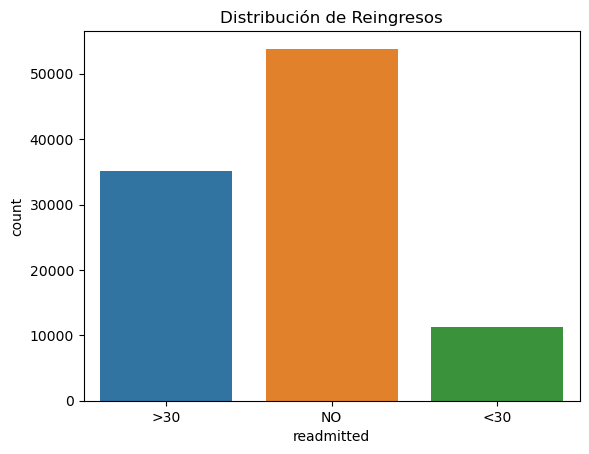

In [13]:
# Distribución de la variable objetivo (readmitted)
if 'readmitted' in diabetes_df.columns:
    print("\nDistribución de reingresos:")
    print(diabetes_df['readmitted'].value_counts())
    sns.countplot(data=diabetes_df, x='readmitted')
    plt.title('Distribución de Reingresos')
    plt.show()

In [14]:
# Verificar los valores únicos antes de transformar
print("Valores únicos antes de la transformación:")
print(diabetes_df['readmitted'].unique())

# Transformar la columna readmitted
diabetes_df['readmitted'] = diabetes_df['readmitted'].map({'NO': 0, '<30': 1, '>30': 1})

# Verificar los valores únicos después de transformar
print("\nValores únicos después de la transformación:")
print(diabetes_df['readmitted'].unique())

# Comprobar el tipo de la columna
print("\nTipo de dato de la columna 'readmitted':", diabetes_df['readmitted'].dtype)


Valores únicos antes de la transformación:
['>30' 'NO' '<30']

Valores únicos después de la transformación:
[1 0]

Tipo de dato de la columna 'readmitted': int64


In [15]:
# Crear un diccionario para asignar manualmente números a cada rango
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

# Transformar la columna age utilizando el diccionario
diabetes_df['age'] = diabetes_df['age'].map(age_mapping)

# Verificar la transformación
print("\nPrimeros registros después de la transformación:")
print(diabetes_df[['age']].head())



Primeros registros después de la transformación:
   age
0    2
1    3
2    4
3    5
4    6


In [16]:
# Verificar los valores únicos antes de transformar
print("Valores únicos antes de la transformación:")
print(diabetes_df['change'].unique())

# Transformar la columna readmitted
diabetes_df['change'] = diabetes_df['change'].map({'No': 0, 'Ch': 1})

# Verificar los valores únicos después de transformar
print("\nValores únicos después de la transformación:")
print(diabetes_df['change'].unique())

# Comprobar el tipo de la columna
print("\nTipo de dato de la columna 'change':", diabetes_df['change'].dtype)

Valores únicos antes de la transformación:
['Ch' 'No']

Valores únicos después de la transformación:
[1 0]

Tipo de dato de la columna 'change': int64


In [17]:
# Verificar los valores únicos antes de transformar
print("Valores únicos antes de la transformación:")
print(diabetes_df['diabetesMed'].unique())

# Transformar la columna readmitted
diabetes_df['diabetesMed'] = diabetes_df['diabetesMed'].map({'No': 0, 'Yes': 1})

# Verificar los valores únicos después de transformar
print("\nValores únicos después de la transformación:")
print(diabetes_df['diabetesMed'].unique())

# Comprobar el tipo de la columna
print("\nTipo de dato de la columna 'diabetesMed':", diabetes_df['diabetesMed'].dtype)

Valores únicos antes de la transformación:
['Yes' 'No']

Valores únicos después de la transformación:
[1 0]

Tipo de dato de la columna 'diabetesMed': int64


In [18]:
diabetes_df["diabetesMed"].value_counts(dropna=False, normalize=True)

diabetesMed
1    0.769675
0    0.230325
Name: proportion, dtype: float64

###  DecisionTreeClassifier

In [19]:
features = ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed']

In [20]:
pipeline_dt = Pipeline([
    ("classifier",  DecisionTreeClassifier())
]) 

In [21]:
param_grid_dt = {
    "classifier__max_depth": [3,4,5,6,7],
    "classifier__min_samples_leaf" : [5, 10, 15],
    "classifier__criterion": ["gini", "entropy", "log_loss"]
}

In [22]:
grid_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_df[features], diabetes_df["readmitted"], test_size=0.3, random_state=1)

In [24]:
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [5, 10, 15]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

In [25]:
grid_dt.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 5}

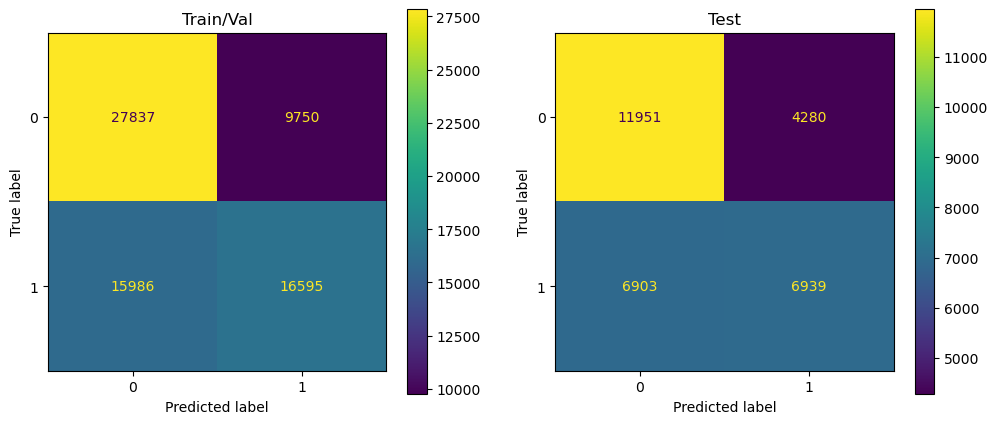

In [26]:
train_val_preds = grid_dt.best_estimator_.predict(x_train)
test_preds = grid_dt.best_estimator_.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, train_val_preds, labels=grid_dt.best_estimator_.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=grid_dt.best_estimator_.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

test_cm = confusion_matrix(y_test, test_preds, labels=grid_dt.best_estimator_.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=grid_dt.best_estimator_.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [27]:
print("Accuracy:")
print("- Train/Val:", accuracy_score(y_train, train_val_preds))
print("- Test:", accuracy_score(y_test, test_preds))
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_val_preds))
print("- Test:", precision_score(y_test, test_preds))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_val_preds))
print("- Test:", recall_score(y_test, test_preds))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_val_preds))
print("- Test:", f1_score(y_test, test_preds))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_val_preds))
print("- Test:", roc_auc_score(y_test, test_preds))

Accuracy:
- Train/Val: 0.633223121650895
- Test: 0.6281381970538357
Precision:
- Train/Val: 0.6299107990130954
- Test: 0.6185043230234424

Recall:
- Train/Val: 0.5093459378165188
- Test: 0.5013003901170351

F1:
- Train/Val: 0.5632488205545939
- Test: 0.5537688041179522

ROC AUC:
- Train/Val: 0.6249738708158338
- Test: 0.6188037284206025


## RandomForestClassifier

In [28]:
pipeline_rf = Pipeline([("classifier",  RandomForestClassifier(random_state=10))])


In [29]:
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth" : [3, 4, 5, 6],
    "classifier__class_weight": ["balanced", None]
}

In [30]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)


In [31]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=10))]),
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_depth': [3, 4, 5, 6],
                         'classifier__n_estimators': [50, 100, 150]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

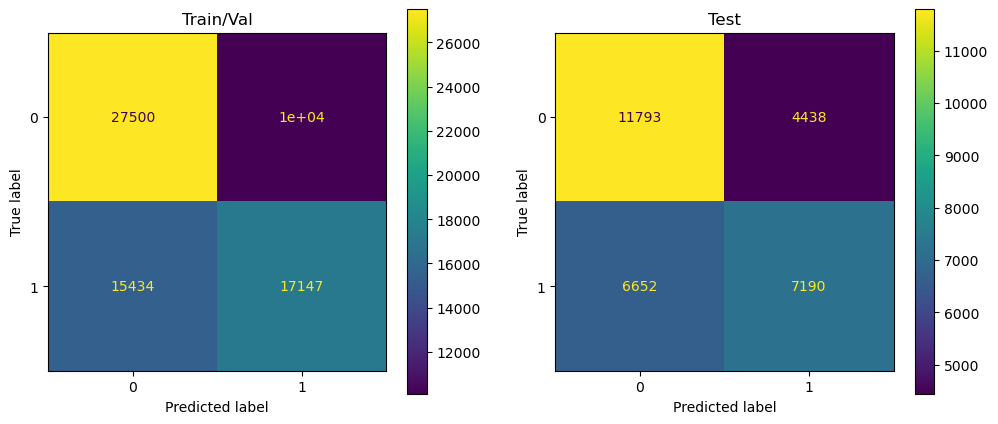

In [32]:
train_val_preds = grid_rf.best_estimator_.predict(x_train)
test_preds = grid_rf.best_estimator_.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, train_val_preds, labels=grid_rf.best_estimator_.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=grid_rf.best_estimator_.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

test_cm = confusion_matrix(y_test, test_preds, labels=grid_rf.best_estimator_.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=grid_rf.best_estimator_.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [33]:
print("Accuracy:")
print("- Train/Val:", accuracy_score(y_train, train_val_preds))
print("- Test:", accuracy_score(y_test, test_preds))
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_val_preds))
print("- Test:", precision_score(y_test, test_preds))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_val_preds))
print("- Test:", recall_score(y_test, test_preds))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_val_preds))
print("- Test:", f1_score(y_test, test_preds))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_val_preds))
print("- Test:", roc_auc_score(y_test, test_preds))

Accuracy:
- Train/Val: 0.6362871964428229
- Test: 0.6312306720313903
Precision:
- Train/Val: 0.6296173900271719
- Test: 0.6183350533195734

Recall:
- Train/Val: 0.5262883275528683
- Test: 0.5194336078601358

F1:
- Train/Val: 0.5733344478809663
- Test: 0.5645857872006282

ROC AUC:
- Train/Val: 0.6289621327550703
- Test: 0.6230031079162671


## Regresión Logística

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
# Initializing the model
model = LogisticRegression(penalty="l2", C=0.1, solver="liblinear", class_weight="balanced", random_state=80)
# Training the model using training dataset
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [35]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [36]:
pd.DataFrame(np.append(np.array(features).reshape(-1, 1), model.coef_.reshape(-1, 1), axis=1), columns=["feature", "coefficient"])

,feature,coefficient
0,age,0.039016610889639716
1,admission_type_id,0.03260585988325391
2,discharge_disposition_id,-0.05939372404757834
3,admission_source_id,0.023444218166295154
4,time_in_hospital,0.03918429376067239
5,num_lab_procedures,0.026542971046125796
6,num_procedures,-0.08357899978262498
7,num_medications,0.017137086016411784
8,number_outpatient,0.10332898603151955
9,number_emergency,0.20756840484097447


In [37]:
predictions = model.predict(scaler.transform(x_test))

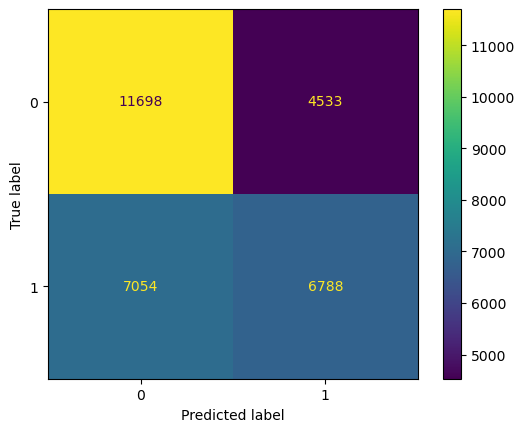

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [39]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1", f1_score(y_test, predictions))
print("ROC AUC", roc_auc_score(y_test, predictions))

Accuracy: 0.6147042197319855
Precision: 0.5995936754703648
Recall: 0.49039156191301836
F1 0.5395223145093987
ROC AUC 0.6055555862673341


In [40]:
classification_report(y_test, predictions, output_dict=True)

{'0': {'precision': 0.6238267918088737,
  'recall': 0.7207196106216499,
  'f1-score': 0.6687819798187691,
  'support': 16231.0},
 '1': {'precision': 0.5995936754703648,
  'recall': 0.49039156191301836,
  'f1-score': 0.5395223145093987,
  'support': 13842.0},
 'accuracy': 0.6147042197319855,
 'macro avg': {'precision': 0.6117102336396192,
  'recall': 0.6055555862673341,
  'f1-score': 0.6041521471640838,
  'support': 30073.0},
 'weighted avg': {'precision': 0.6126727733751411,
  'recall': 0.6147042197319855,
  'f1-score': 0.6092863429613785,
  'support': 30073.0}}

c:\Users\lperd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


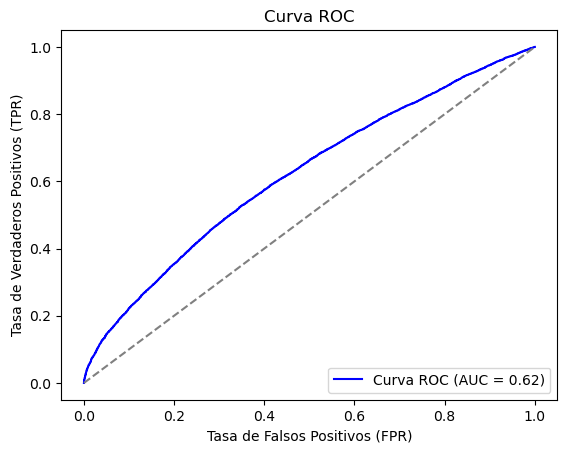

In [41]:
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia (modelo aleatorio)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

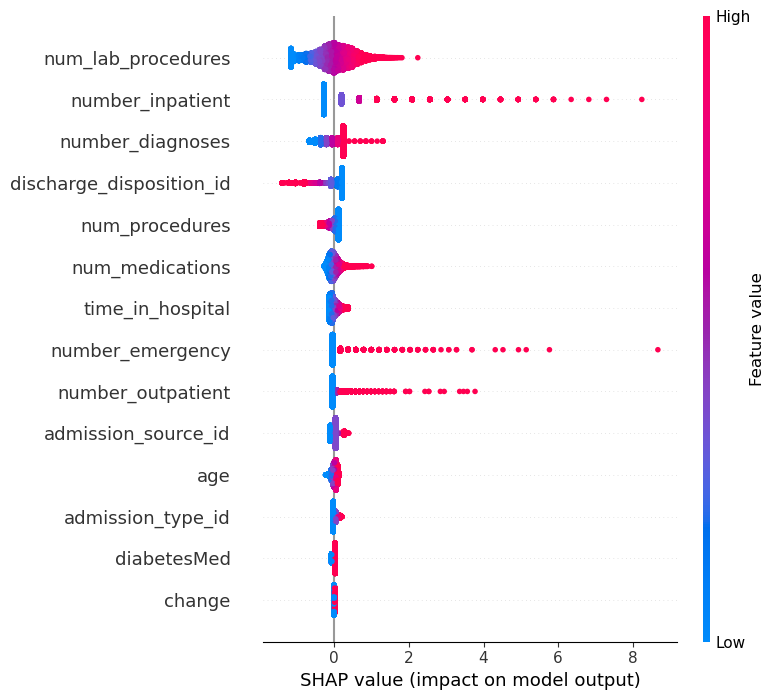

In [42]:
explainer = shap.Explainer(model, x_test)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)

### GradientBoostingClassifier

In [43]:
# Escalado de características (opcional para Gradient Boosting, pero puede ser útil si las variables tienen diferentes escalas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Entrenar el modelo
gb_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = gb_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nExactitud del Modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de Confusión:
[[12242  3989]
 [ 6973  6869]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     16231
           1       0.63      0.50      0.56     13842

    accuracy                           0.64     30073
   macro avg       0.63      0.63      0.62     30073
weighted avg       0.64      0.64      0.63     30073


Exactitud del Modelo:
0.6354869816779171


### A/B Testing

In [44]:
control = grid_dt.best_estimator_
variant = grid_rf.best_estimator_

In [45]:
xtestA, xtestB, ytestA, ytestB = train_test_split(x_test, y_test, test_size=0.5)

In [46]:
ypred_control=control.predict(xtestA)
ypred_variant=variant.predict(xtestB)

In [47]:
acc_control = (ypred_control==ytestA).astype(int)
acc_variante = (ypred_variant==ytestB).astype(int)

print(acc_control.mean())
print(acc_variante.mean())

0.6250997605746209
0.6353660969608299


In [48]:
t_stat, p_value = stats.ttest_rel(acc_control, acc_variante)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

ValueError: unequal length arrays

#### Test de McNemar para la matriz de confusión

In [49]:
ypred_control=control.predict(x_test)
ypred_variant=variant.predict(x_test) 

In [50]:
tb = mcnemar_tables(y_test, 
                    ypred_control, 
                    ypred_variant)

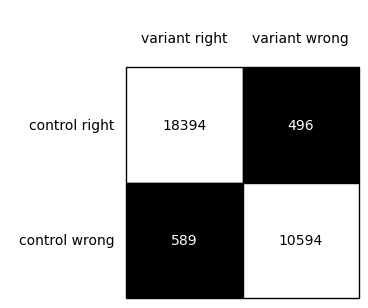

In [51]:

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['variant right', 'variant wrong'],
                        row_labels=['control right', 'control wrong'])
plt.show()

Ambos modelos predijeron correctamente las clases de 17753 instancias, y ambos clasificaron incorrectamente 9990 instancias. El control clasificó incorrectamente 1067 instancias que la variante clasificó correctamente, mientras que la variante clasificó 1263 instancias incorrectamente que el control clasificó correctamente. Hay un radio de 1267:1067, el control lo hizo mejor que la variante.

#### t-test 5x2cv

In [52]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.800, t-Statistic: -0.267


In [53]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=x_test, y=y_test, scoring='precision', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.173, t-Statistic: 1.589


In [54]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=x_test, y=y_test, scoring='recall', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.064, t-Statistic: -2.365


Como conclusión vemos que en términos de exactitud y recall ambos modelos no tienen diferencias significativas. Sin embargo, en términos de precisión son suficientemente diferentes.

### Justicia

In [55]:
# Separar las predicciones por género
gender_groups = diabetes_df['gender'].unique()  

# Diccionario para almacenar resultados
fairness_metrics = {}

# Asume que `model` es el modelo entrenado y `xtestA`, `ytestA` son los datos de prueba
for gender in gender_groups:
    # Filtrar los datos por grupo de género
    gender_mask = diabetes_df['gender'] == gender
    x_gender = xtestA[gender_mask]
    y_gender = ytestA[gender_mask]
    
    # Obtener predicciones
    y_pred_gender = grid_rf.best_estimator_.predict(x_gender)
    
    # Calcular métricas y almacenarlas
    fairness_metrics[gender] = classification_report(
        y_gender, y_pred_gender, output_dict=True
    )

# Mostrar resultados
for gender, metrics in fairness_metrics.items():
    print(f"\nMétricas para el género {gender}:")
    print(metrics)



Métricas para el género Female:
{'0': {'precision': 0.6335238873009391, 'recall': 0.7224679860302677, 'f1-score': 0.6750788643533123, 'support': 4295.0}, '1': {'precision': 0.6320987654320988, 'recall': 0.5329169919333854, 'f1-score': 0.578286036989976, 'support': 3843.0}, 'accuracy': 0.6329565003686409, 'macro avg': {'precision': 0.6328113263665189, 'recall': 0.6276924889818265, 'f1-score': 0.6266824506716442, 'support': 8138.0}, 'weighted avg': {'precision': 0.6328509033562411, 'recall': 0.6329565003686409, 'f1-score': 0.629370479546566, 'support': 8138.0}}

Métricas para el género Male:
{'0': {'precision': 0.6588928150765606, 'recall': 0.7291449426485923, 'f1-score': 0.6922410592748423, 'support': 3836.0}, '1': {'precision': 0.6083678854127403, 'recall': 0.527106466361855, 'f1-score': 0.5648293963254594, 'support': 3062.0}, 'accuracy': 0.6394607132502175, 'macro avg': {'precision': 0.6336303502446505, 'recall': 0.6281257045052236, 'f1-score': 0.6285352278001508, 'support': 6898.0},

C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\2712403975.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_gender = xtestA[gender_mask]
C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\2712403975.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_gender = xtestA[gender_mask]


In [56]:
# Separar las predicciones por género
race_groups = diabetes_df['race'].unique()  

# Diccionario para almacenar resultados
fairness_metrics = {}

# Asume que `model` es el modelo entrenado y `xtestA`, `ytestA` son los datos de prueba
for race in race_groups:
    # Filtrar los datos por grupo de género
    race_mask = diabetes_df['race'] == race
    x_race = xtestA[race_mask]
    y_race = ytestA[race_mask]
    
    # Obtener predicciones
    y_pred_race = grid_rf.best_estimator_.predict(x_race)
    
    # Calcular métricas y almacenarlas
    fairness_metrics[race] = classification_report(
        y_race, y_pred_race, output_dict=True
    )

# Mostrar resultados
for race, metrics in fairness_metrics.items():
    print(f"\nMétricas para la raza {race}:")
    print(metrics)

C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\658491995.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_race = xtestA[race_mask]
C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\658491995.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_race = xtestA[race_mask]
C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\658491995.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_race = xtestA[race_mask]
C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\658491995.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_race = xtestA[race_mask]



Métricas para la raza Caucasian:
{'0': {'precision': 0.6344437834622249, 'recall': 0.7125438449974946, 'f1-score': 0.6712296436157659, 'support': 5987.0}, '1': {'precision': 0.6209251101321586, 'recall': 0.5342050407428464, 'f1-score': 0.5743098706325761, 'support': 5277.0}, 'accuracy': 0.6289950284090909, 'macro avg': {'precision': 0.6276844467971917, 'recall': 0.6233744428701704, 'f1-score': 0.622769757124171, 'support': 11264.0}, 'weighted avg': {'precision': 0.6281105058376901, 'recall': 0.6289950284090909, 'f1-score': 0.6258243131796604, 'support': 11264.0}}

Métricas para la raza AfricanAmerican:
{'0': {'precision': 0.667435158501441, 'recall': 0.7432605905006419, 'f1-score': 0.7033100516246583, 'support': 1558.0}, '1': {'precision': 0.634703196347032, 'recall': 0.5463836477987422, 'f1-score': 0.5872412336290663, 'support': 1272.0}, 'accuracy': 0.6547703180212014, 'macro avg': {'precision': 0.6510691774242365, 'recall': 0.644822119149692, 'f1-score': 0.6452756426268623, 'support

C:\Users\lperd\AppData\Local\Temp\ipykernel_15720\658491995.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_race = xtestA[race_mask]


In [57]:
protected_attributes = ['race', 'gender']  

# Añadir predicciones al conjunto de prueba
X_test_with_attributes = x_test.copy()
X_test_with_attributes['race'] = diabetes_df.loc[x_test.index, 'race']
X_test_with_attributes['gender'] = diabetes_df.loc[x_test.index, 'gender']
X_test_with_attributes['true_label'] = y_test
X_test_with_attributes['predicted_label'] = predictions

# Validar justicia por grupo
for attribute in protected_attributes:
    print(f"\nAnálisis de justicia basado en: {attribute}")
    for group in X_test_with_attributes[attribute].unique():
        group_data = X_test_with_attributes[X_test_with_attributes[attribute] == group]
        
        # Verificar el tamaño del grupo
        print(f"\nGrupo: {group} (Tamaño: {len(group_data)})")
        
        # Matriz de confusión
        cm = confusion_matrix(group_data['true_label'], group_data['predicted_label'])
        print("Matriz de Confusión:")
        print(cm)
        
        # Métricas de clasificación
        report = classification_report(group_data['true_label'], group_data['predicted_label'], zero_division=0)
        print("\nReporte de Clasificación:")
        print(report)



Análisis de justicia basado en: race

Grupo: Caucasian (Tamaño: 22524)
Matriz de Confusión:
[[8482 3490]
 [5289 5263]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66     11972
           1       0.60      0.50      0.55     10552

    accuracy                           0.61     22524
   macro avg       0.61      0.60      0.60     22524
weighted avg       0.61      0.61      0.61     22524


Grupo: Other (Tamaño: 1101)
Matriz de Confusión:
[[594 132]
 [230 145]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       726
           1       0.52      0.39      0.44       375

    accuracy                           0.67      1101
   macro avg       0.62      0.60      0.61      1101
weighted avg       0.65      0.67      0.66      1101


Grupo: AfricanAmerican (Tamaño: 5643)
Matriz de Confusión:
[[2274  800]
 [1353 1216]]

Reporte de 

El modelo es justo en términos de gender. Sin embargo, se evidencia que para términos de raza, hay un sesgo.

### Aumento de datos

In [58]:
X = x_train # Características
y = y_train  # Variable objetivo

# Aplicar SMOTE para generar nuevos datos sintéticos
smote = SMOTENC(random_state=42, categorical_features=['age'])
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos aumentados
x_train_augmented = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                                 pd.DataFrame(y_resampled, columns=['readmitted'])], axis=1)

print("Datos originales:", x_train.shape)
print("Datos aumentados:", x_train_augmented.shape)

Datos originales: (70168, 14)
Datos aumentados: (75174, 15)


### Despliegue

Para modelos online la petición y respuesta deben ser mediante una API

Para modelos offline se debe hacer mediante procesamientos bash y los resultados almacenados en bases de datos





In [59]:
import joblib

# Guardar el modelo
joblib.dump(model, 'logistic_regression_model.pkl')

# Cargar el modelo en producción
model_load = joblib.load('logistic_regression_model.pkl')


API

In [60]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Cargar el modelo y el escalador
model = joblib.load('logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Preprocesar los datos
    X = scaler.transform([data['features']])
    prediction = model.predict(X)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

Usa Docker para encapsular la aplicación y el modelo en un contenedor

In [ ]:
# Dockerfile
FROM python:3.9-slim
WORKDIR /app
COPY . .
RUN pip install -r requirements.txt
CMD ["python", "app.py"]


Desplegar con Kubernetes

Para la Clínica de los Alpes:

1. Despliega el modelo como una API en la nube para que los sistemas hospitalarios puedan enviar datos de pacientes en tiempo real.
2. Proporciona la predicción del riesgo de reingreso al personal médico a través de una interfaz gráfica o integración con su sistema de gestión hospitalaria.
3. Monitorea el rendimiento y recopila nuevos datos para reentrenar el modelo periódicamente.